In [4]:
#Importa os pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('dark_background')

#### Dicionário de Variáveis utilizadas
|Chave|Descrição|Função|
|-----|-----|-----|
|**Identificação**|
|Ano| Ano de referência|Controle|
|Trimestre| Trimestre de referência|Controle|
|UF| Estado|Controle|
|Capital| Capital da UF|Controle|
|UPA| Unidade Primária de Amostragem (UF(2) + número squencial(6) + DV(1))|Controle|
|V1008| Número do Domicílio|Controle|
|V1014| Painel - Grupo de Controle|Controle|
|V1016| Número de entrevista (1 a 5)|Controle|
|V2003| Número de ordem|Controle|
|**Características**|
|V2007| Sexo|Característica|
|V2008| Dia Nascimento|Característica|
|V20081| Mês nascimento|Característica|
|V20082| Ano nascimento|Característica|
|V2010| Raça|Característica|
|**Variáveis exploradas**|
| VD4001 | Condição em relação à força de trabalho na semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
| VD4002 | Condição de ocupação na semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
| VD4003 | Força de trabalho potencial para pessoas de 14 anos ou mais de idade | Descrição |
| VD4004 | Subocupação por insuficiência de horas efetivamente trabalhadas em todos os trabalhos | Descrição |
|**Auxiliares**|
|V1028| Peso do domicílio e das pessoas sem calibração|Expansão|
|V1029| Peso do domicílio e das pessoas com calibração|Expansão|
|V1033| Projeção da população por sexo e idade|Expansão|
|posest|Domínios de projeção geográficos|Expansão|

 Chave para pessoa: UPA + V1008 + V1014  + V2003 + V2007 + V2008 + V20081 + V20082

 **PARA ESTIMAÇÃO DA POPULAÇÃO, DEVE-SE USAR AS VARIÁVEIS: V1033 e posest.**



#### Importação e tratamento dos microdados

Importação dos microdados

In [5]:
#determina qual diretório usar para cada sistema operacional.
import os
if os.name == 'nt': #windows
    diretorio = 'C:\\Users\\est.matheus.brasil\\Documents\\Microdados PNAD Contínua\\'
else: #linux(ou mac)
    diretorio = '/home/matheus/Microdados PNAD/'



#Leitura de todas as bases com as variáveis selecionadas e criação de variáveis dinamicamente.

colunas_selecionadas = ['Ano', 'Trimestre', 'UPA', 'UF', 'V1008', 'V1014', 'V2007', 'V2008', 'V20081', 'V20082', 'V2010', #Controle
                        'VD4001', 'VD4002', 'VD4003', 'VD4004', #Variáveis de interesse
                        'V1028', 'V1029', 'V1033', 'posest', 'posest_sxi'] #identificação

for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{diretorio}{ano}_{tri}.csv', usecols=colunas_selecionadas, encoding='utf_8_sig')
        if 2019 < ano < 2022:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{diretorio}{ano}_{tri}.csv', usecols=colunas_selecionadas, encoding='utf_8_sig')
        if ano == 2022 and tri < 3:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{diretorio}{ano}_{tri}.csv', usecols=colunas_selecionadas, encoding='utf_8_sig')

2019 4
2020 1
2020 2
2020 3
2020 4
2021 1
2021 2
2021 3
2021 4
2022 1
2022 2


In [6]:
#Conversão das variável V2007(sexo) para inteira para criar ID do indivíduo. (Homem = 0, Mulher = 1)
for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            globals()[f'pnad_{ano}_{tri}']['V2007'] = np.where(globals()[f'pnad_{ano}_{tri}']['V2007'] == 'Homem', 0, 1)
        if 2019 < ano < 2022:
            globals()[f'pnad_{ano}_{tri}']['V2007'] = np.where(globals()[f'pnad_{ano}_{tri}']['V2007'] == 'Homem', 0, 1)
        if ano == 2022 and tri < 3:
            globals()[f'pnad_{ano}_{tri}']['V2007'] = np.where(globals()[f'pnad_{ano}_{tri}']['V2007'] == 'Homem', 0, 1)


In [7]:
#Organização das variáveis e criação da chave de ID do indivíduo em cada dataframe.

for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            globals()[f'pnad_{ano}_{tri}_id_sit'] = pd.DataFrame({
                                                      'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                      'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],
                                                      'UPA':globals()[f'pnad_{ano}_{tri}']['UPA'],
                                                      'UF':globals()[f'pnad_{ano}_{tri}']['UF'],
                                                      'V2007':globals()[f'pnad_{ano}_{tri}']['V2007'],  
                                                      'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                            globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                            globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                            globals()[f'pnad_{ano}_{tri}']['V2007'] +
                                                            globals()[f'pnad_{ano}_{tri}']['V2008'] +
                                                            globals()[f'pnad_{ano}_{tri}']['V20081'] +
                                                            globals()[f'pnad_{ano}_{tri}']['V20082'],
                                                      'V2010': globals()[f'pnad_{ano}_{tri}']['V2010'],
                                                      'VD4001': globals()[f'pnad_{ano}_{tri}']['VD4001'],
                                                      'VD4002': globals()[f'pnad_{ano}_{tri}']['VD4002'],
                                                      'VD4003': globals()[f'pnad_{ano}_{tri}']['VD4003'],
                                                      'VD4004': globals()[f'pnad_{ano}_{tri}']['VD4004'],
                                                      'V1028': globals()[f'pnad_{ano}_{tri}']['V1028'],
                                                      'V1029': globals()[f'pnad_{ano}_{tri}']['V1029'],
                                                      'V1033': globals()[f'pnad_{ano}_{tri}']['V1033'],
                                                      'posest': globals()[f'pnad_{ano}_{tri}']['posest'],
                                                      'posest_sxi': globals()[f'pnad_{ano}_{tri}']['posest_sxi']
                                                      })
        if 2019 < ano < 2022:
            globals()[f'pnad_{ano}_{tri}_id_sit'] = pd.DataFrame({
                                                      'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                      'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],
                                                      'UPA':globals()[f'pnad_{ano}_{tri}']['UPA'],
                                                      'UF':globals()[f'pnad_{ano}_{tri}']['UF'],
                                                      'V2007':globals()[f'pnad_{ano}_{tri}']['V2007'],  
                                                      'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                            globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                            globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                            globals()[f'pnad_{ano}_{tri}']['V2007'] +
                                                            globals()[f'pnad_{ano}_{tri}']['V2008'] +
                                                            globals()[f'pnad_{ano}_{tri}']['V20081'] +
                                                            globals()[f'pnad_{ano}_{tri}']['V20082'],
                                                      'V2010': globals()[f'pnad_{ano}_{tri}']['V2010'],
                                                      'VD4001': globals()[f'pnad_{ano}_{tri}']['VD4001'],
                                                      'VD4002': globals()[f'pnad_{ano}_{tri}']['VD4002'],
                                                      'VD4003': globals()[f'pnad_{ano}_{tri}']['VD4003'],
                                                      'VD4004': globals()[f'pnad_{ano}_{tri}']['VD4004'],
                                                      'V1028': globals()[f'pnad_{ano}_{tri}']['V1028'],
                                                      'V1029': globals()[f'pnad_{ano}_{tri}']['V1029'],
                                                      'V1033': globals()[f'pnad_{ano}_{tri}']['V1033'],
                                                      'posest': globals()[f'pnad_{ano}_{tri}']['posest'],
                                                      'posest_sxi': globals()[f'pnad_{ano}_{tri}']['posest_sxi']
                                                      })
        if ano == 2022 and tri < 3:
            globals()[f'pnad_{ano}_{tri}_id_sit'] = pd.DataFrame({
                                                      'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                      'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],
                                                      'UPA':globals()[f'pnad_{ano}_{tri}']['UPA'],
                                                      'UF':globals()[f'pnad_{ano}_{tri}']['UF'],
                                                      'V2007':globals()[f'pnad_{ano}_{tri}']['V2007'],  
                                                      'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                            globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                            globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                            globals()[f'pnad_{ano}_{tri}']['V2007'] +
                                                            globals()[f'pnad_{ano}_{tri}']['V2008'] +
                                                            globals()[f'pnad_{ano}_{tri}']['V20081'] +
                                                            globals()[f'pnad_{ano}_{tri}']['V20082'],
                                                      'V2010': globals()[f'pnad_{ano}_{tri}']['V2010'],
                                                      'VD4001': globals()[f'pnad_{ano}_{tri}']['VD4001'],
                                                      'VD4002': globals()[f'pnad_{ano}_{tri}']['VD4002'],
                                                      'VD4003': globals()[f'pnad_{ano}_{tri}']['VD4003'],
                                                      'VD4004': globals()[f'pnad_{ano}_{tri}']['VD4004'],
                                                      'V1028': globals()[f'pnad_{ano}_{tri}']['V1028'],
                                                      'V1029': globals()[f'pnad_{ano}_{tri}']['V1029'],
                                                      'V1033': globals()[f'pnad_{ano}_{tri}']['V1033'],
                                                      'posest': globals()[f'pnad_{ano}_{tri}']['posest'],
                                                      'posest_sxi': globals()[f'pnad_{ano}_{tri}']['posest_sxi']
                                                      })

In [8]:
#Concatena todos os dataframes de cada ano e trimestre em uma unica tabela.

pnadc_completa = pd.concat([pnad_2019_4_id_sit, 
                            pnad_2020_1_id_sit, 
                            pnad_2020_2_id_sit, 
                            pnad_2020_3_id_sit, 
                            pnad_2020_4_id_sit, 
                            pnad_2021_1_id_sit, 
                            pnad_2021_2_id_sit, 
                            pnad_2021_3_id_sit, 
                            pnad_2021_4_id_sit, 
                            pnad_2022_1_id_sit, 
                            pnad_2022_2_id_sit])

In [9]:
pnadc_completa

,Ano,Trimestre,UPA,UF,V2007,ID,V2010,VD4001,VD4002,VD4003,VD4004,V1028,V1029,V1033,posest,posest_sxi
0,2019,4,110000016,Rondônia,1,110002003,Parda,Pessoas na força de trabalho,Pessoas ocupadas,NaN,NaN,145.628790,532471,6982307,111,210
1,2019,4,110000016,Rondônia,1,110002034,Parda,Pessoas fora da força de trabalho,NaN,Pessoas fora da força de trabalho e fora da fo...,NaN,145.628790,532471,8485527,111,206
2,2019,4,110000016,Rondônia,1,110002051,Parda,Pessoas fora da força de trabalho,NaN,Pessoas fora da força de trabalho e fora da fo...,NaN,145.628790,532471,9316281,111,204
3,2019,4,110000016,Rondônia,0,110002077,Parda,NaN,NaN,NaN,NaN,145.628790,532471,7432741,111,102
4,2019,4,110000016,Rondônia,0,110002012,Parda,Pessoas fora da força de trabalho,NaN,Pessoas fora da força de trabalho e na força d...,NaN,134.017538,532471,5214819,111,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482113,2022,2,530057544,Distrito Federal,0,530059585,Parda,Pessoas na força de trabalho,Pessoas ocupadas,NaN,NaN,81.626590,3125014,8442398,531,107
482114,2022,2,530057544,Distrito Federal,0,530059543,Preta,Pessoas na força de trabalho,Pessoas ocupadas,NaN,NaN,72.323502,3125014,3560554,531,114
482115,2022,2,530057544,Distrito Federal,0,530059578,Preta,Pessoas na força de trabalho,Pessoas ocupadas,NaN,NaN,72.323502,3125014,8409440,531,108
482116,2022,2,530057544,Distrito Federal,1,530059586,Branca,Pessoas fora da força de trabalho,NaN,Pessoas fora da força de trabalho e fora da fo...,NaN,72.323502,3125014,8558427,531,207


In [10]:
# Ordernação da série histórica por ano e trimestre.
pnadc_completa.sort_values(by=['Ano', 'Trimestre'], inplace=True)

In [11]:
#concatena a coluna 'Ano' e 'Trimestre' em uma única coluna.
pnadc_completa['ano_tri'] = pnadc_completa['Ano'].astype(str) + 'Q' + pnadc_completa['Trimestre'].astype(str)

In [12]:
#Conversão da coluna ano_tri para datetime.
pnadc_completa['ano_tri'] = pd.PeriodIndex(pnadc_completa['ano_tri'], freq='Q')

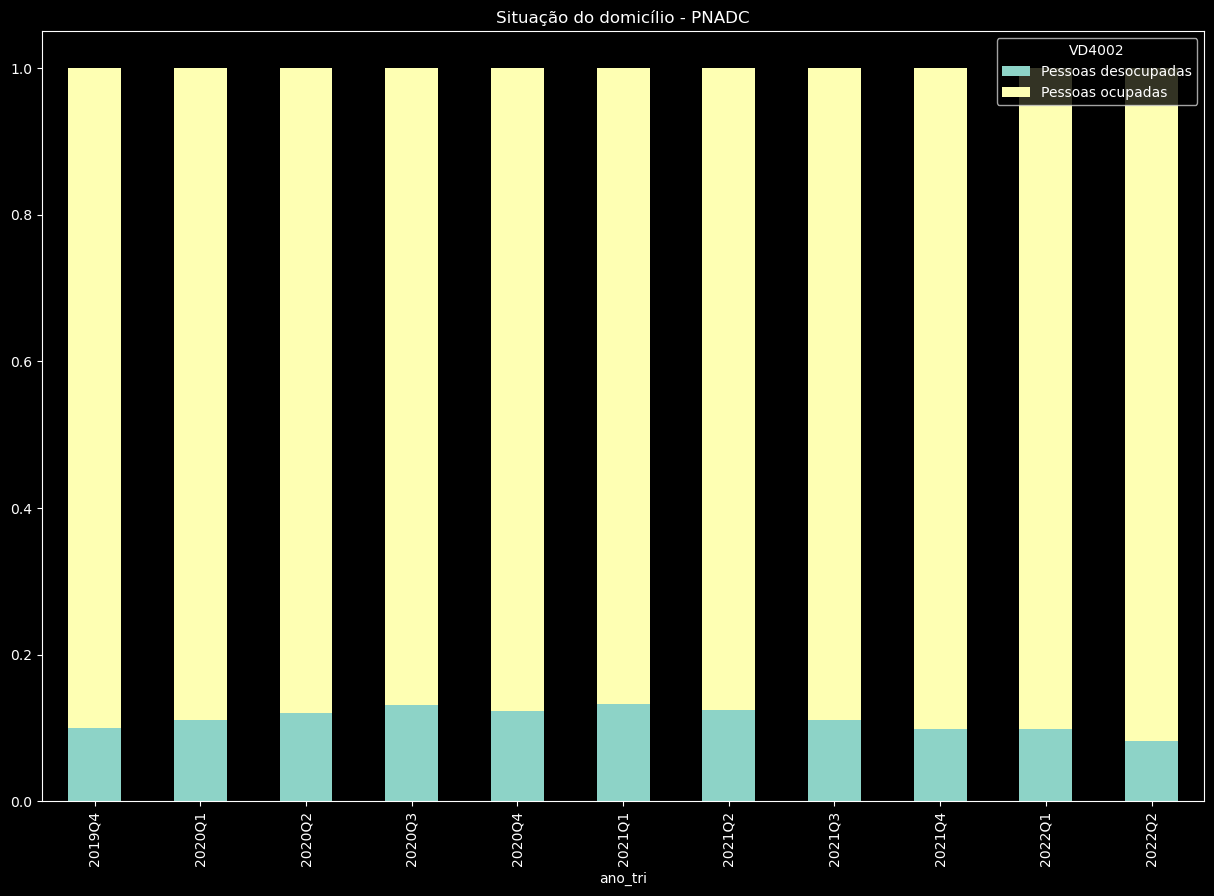

In [20]:
situacao_expandida = pd.crosstab(index=pnadc_completa['ano_tri'],
                            columns=pnadc_completa['VD4002'], 
                            values=(pnadc_completa['V1029']*pnadc_completa['posest'])/pnadc_completa['V1029'], 
                            aggfunc='sum',
                            normalize='index')                            

situacao_expandida.plot(kind='bar', stacked=True, figsize=(15, 10), title='Situação do domicílio - PNADC')
plt.show()